In [6]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip list

In [98]:
 !pip install openpyxl

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
df = pd.read_excel("3.xlsx", engine='openpyxl')

In [101]:
df.head()

,Успех,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,не успішний,9.0,1,2,Light,NaN,1230.0,1.56,5211.0,15610.0,1,1,0,0,1
1,не успішний,30.0,1,2,Light,8.0,2715.0,2.03,2424.0,12600.0,1,1,1,0,0
2,не успішний,15.0,1,2,light,NaN,878.0,1.81,3868.0,12600.0,1,1,0,1,1
3,не успішний,20.0,1,2,light,NaN,2346.0,2.18,4546.0,13930.0,1,1,0,0,1
4,не успішний,30.0,1,2,light,NaN,2542.0,1.63,3244.0,16030.0,0,0,0,0,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Успех                             69 non-null     object 
 1   Площадь загальна кв.м             69 non-null     float64
 2   Этаж                              69 non-null     int64  
 3   Количество сотрудников в штаті    69 non-null     int64  
 4   Тип                               69 non-null     object 
 5   Кількість відгуків в гуглі        39 non-null     float64
 6   Количество чеков в месяц          62 non-null     float64
 7   Среднее количество единиц в чеке  62 non-null     float64
 8   Людинопотік                       64 non-null     float64
 9   Середній дохід населення          64 non-null     float64
 10  Зупинка ГТ                        69 non-null     int64  
 11  Зупинка ГТ додому                 69 non-null     int64  
 12  Кінцева зу

# Null values

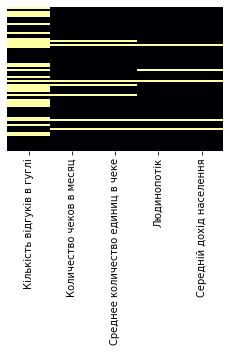

In [103]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > 1].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),
            cbar=False, yticklabels=False, cmap='inferno', ax=ax)
plt.show()

Необходимо заполнить недостающие значения

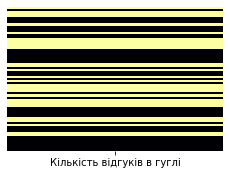

In [104]:
df['Количество чеков в месяц'] = df['Количество чеков в месяц'].fillna(df['Количество чеков в месяц'].mean())
df['Среднее количество единиц в чеке'] = df['Среднее количество единиц в чеке'].fillna(df['Среднее количество единиц в чеке'].mean())
df['Людинопотік'] = df['Людинопотік'].fillna(df['Людинопотік'].mean())
df['Середній дохід населення'] = df['Середній дохід населення'].fillna(df['Середній дохід населення'].mean())
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > 1].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),
            cbar=False, yticklabels=False, cmap='inferno', ax=ax)
plt.show()

Как и было выдно с прошлой визуализации, в переменной колич отзывов слишком много неизвестных показателей, поэтому ее я учитывать не буду

In [105]:
df = df.drop(columns=['Кількість відгуків в гуглі'])
df

,Успех,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,не успішний,9.00,1,2,Light,1230.0,1.56,5211.0,15610.0,1,1,0,0,1
1,не успішний,30.00,1,2,Light,2715.0,2.03,2424.0,12600.0,1,1,1,0,0
2,не успішний,15.00,1,2,light,878.0,1.81,3868.0,12600.0,1,1,0,1,1
3,не успішний,20.00,1,2,light,2346.0,2.18,4546.0,13930.0,1,1,0,0,1
4,не успішний,30.00,1,2,light,2542.0,1.63,3244.0,16030.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,6,Standart,13552.0,1.89,2306.0,8750.0,0,0,0,1,1
65,успішний,27.26,1,4,Light,7598.0,1.85,4065.0,13300.0,0,0,0,0,1
66,не успішний,148.91,1,2,Light,5431.0,1.99,906.0,11060.0,0,0,0,0,0
67,не успішний,50.93,1,3,Standart,4375.0,1.73,1742.0,11900.0,0,0,0,0,0


# Encoding

In [106]:
df.Тип.value_counts()

Light       39
Standart    19
light        9
Micro        1
Premium      1
Name: Тип, dtype: int64

In [109]:
type = {'Light':0,'Standart':1, 'light':0, 'Micro':2, 'Premium': 3}
df['Тип'] = df['Тип'].map(type)

In [110]:
df

,Успех,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,не успішний,9.00,1,2,0,1230.0,1.56,5211.0,15610.0,1,1,0,0,1
1,не успішний,30.00,1,2,0,2715.0,2.03,2424.0,12600.0,1,1,1,0,0
2,не успішний,15.00,1,2,0,878.0,1.81,3868.0,12600.0,1,1,0,1,1
3,не успішний,20.00,1,2,0,2346.0,2.18,4546.0,13930.0,1,1,0,0,1
4,не успішний,30.00,1,2,0,2542.0,1.63,3244.0,16030.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,6,1,13552.0,1.89,2306.0,8750.0,0,0,0,1,1
65,успішний,27.26,1,4,0,7598.0,1.85,4065.0,13300.0,0,0,0,0,1
66,не успішний,148.91,1,2,0,5431.0,1.99,906.0,11060.0,0,0,0,0,0
67,не успішний,50.93,1,3,1,4375.0,1.73,1742.0,11900.0,0,0,0,0,0


In [111]:
df.Успех.value_counts()

не успішний    44
успішний       25
Name: Успех, dtype: int64

In [112]:
type_ = {'не успішний':0,'успішний':1}
df['Успех'] = df['Успех'].map(type_)
df

,Успех,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,0,9.00,1,2,0,1230.0,1.56,5211.0,15610.0,1,1,0,0,1
1,0,30.00,1,2,0,2715.0,2.03,2424.0,12600.0,1,1,1,0,0
2,0,15.00,1,2,0,878.0,1.81,3868.0,12600.0,1,1,0,1,1
3,0,20.00,1,2,0,2346.0,2.18,4546.0,13930.0,1,1,0,0,1
4,0,30.00,1,2,0,2542.0,1.63,3244.0,16030.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,1,6,1,13552.0,1.89,2306.0,8750.0,0,0,0,1,1
65,1,27.26,1,4,0,7598.0,1.85,4065.0,13300.0,0,0,0,0,1
66,0,148.91,1,2,0,5431.0,1.99,906.0,11060.0,0,0,0,0,0
67,0,50.93,1,3,1,4375.0,1.73,1742.0,11900.0,0,0,0,0,0


In [113]:
df.Этаж.value_counts()

1    69
Name: Этаж, dtype: int64

# Chouse features

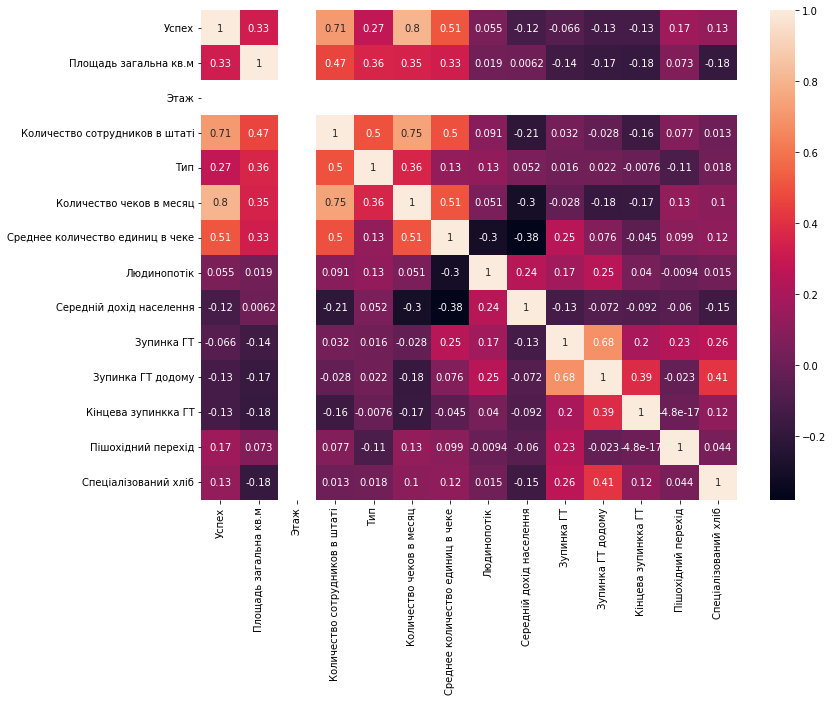

In [114]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Classification Tree & Ensembles

In [115]:
features = ['Количество чеков в месяц', 'Среднее количество единиц в чеке']
X =df[features]
y = df['Успех']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [116]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

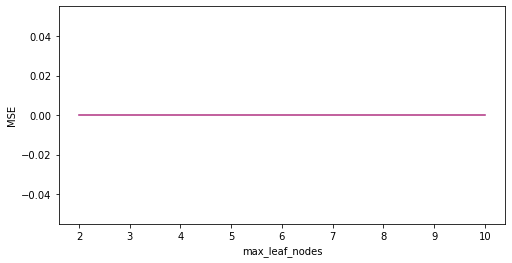

In [117]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

# Model

In [118]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 3, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

# Result

In [119]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

1.0

Можем сделать вывод что в 100% модель соверашет правильных поступков, ошибок нет

In [120]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0]
 [ 0  3]]


In [121]:
Как видно, все 14 примеров распознано верно

SyntaxError: invalid syntax (Temp/ipykernel_11652/2891605648.py, line 1)

In [122]:
df.drop(columns=['Успех']).columns

Index(['Площадь загальна кв.м', 'Этаж', 'Количество сотрудников в штаті',
       'Тип', 'Количество чеков в месяц', 'Среднее количество единиц в чеке',
       'Людинопотік', 'Середній дохід населення', 'Зупинка ГТ',
       'Зупинка ГТ додому', 'Кінцева зупинкка ГТ', 'Пішохідний перехід',
       'Спеціалізований хліб'],
      dtype='object')

Text(0.5, 1.0, 'Boosting. Feature Importance')

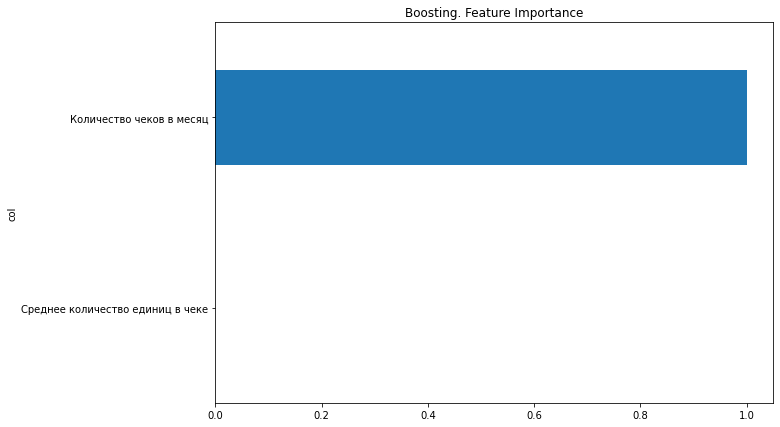

In [123]:
# Features importances
col = features
ct_imp = pd.DataFrame({'imp': ct.feature_importances_, 'col': col})
ct_imp = ct_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
ct_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

# Visualisation

C:\Users\User\anaconda3\envs\GerAlena\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


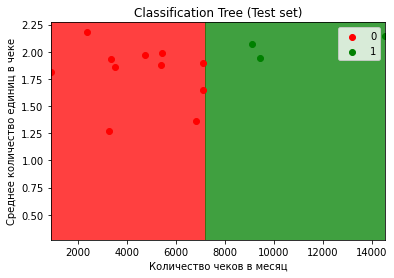

In [124]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков в месяц'].min() - 1, stop = X_set['Количество чеков в месяц'].max() + 1),
                     np.arange(start = X_set['Среднее количество единиц в чеке'].min() - 1, stop = X_set['Среднее количество единиц в чеке'].max() + 1))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков в месяц'][y_set == j], X_set['Среднее количество единиц в чеке'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Количество чеков в месяц')
plt.ylabel('Среднее количество единиц в чеке')
plt.legend()
plt.show()

# Forest

# Paremeters

In [125]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

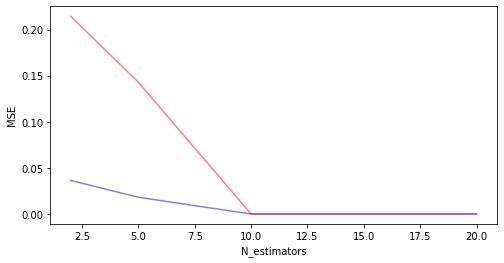

In [126]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [127]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

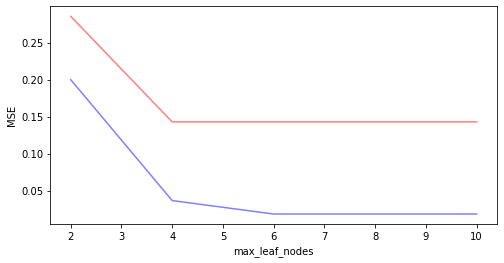

In [128]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

# Model

In [129]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 9, max_leaf_nodes = 8, random_state = 10).fit(X_train, y_train)

# Results

In [130]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

0.929


Можем сделать вывод что в 93% модель совершет правильных поступков,и в 7% ошибается

In [131]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 0  3]]



Видим что 13 примеров распознано верно, 1 не верно

Text(0.5, 1.0, 'Boosting. Feature Importance')

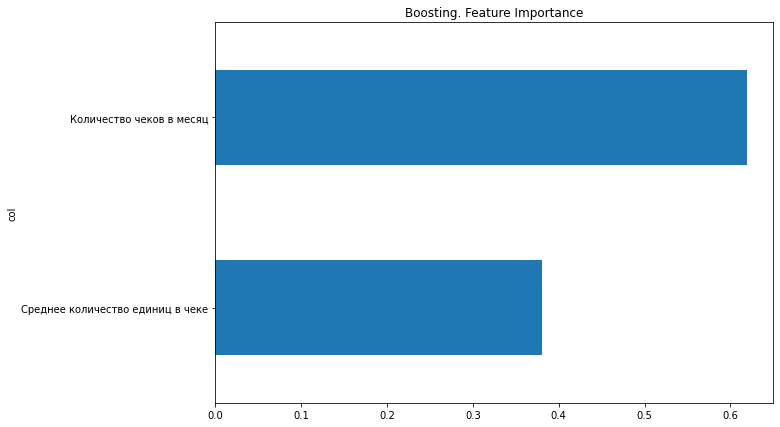

In [132]:
# Features importances
rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': col})
rf_imp = rf_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
rf_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

# Visualisation

C:\Users\User\anaconda3\envs\GerAlena\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


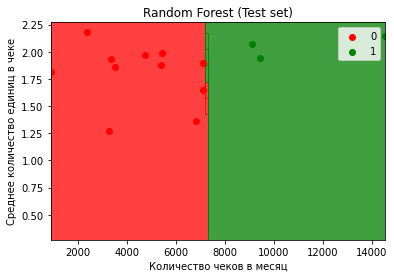

In [133]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков в месяц'].min() - 1, stop = X_set['Количество чеков в месяц'].max() + 1),
                     np.arange(start = X_set['Среднее количество единиц в чеке'].min() - 1, stop = X_set['Среднее количество единиц в чеке'].max() + 1))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков в месяц'][y_set == j], X_set['Среднее количество единиц в чеке'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков в месяц')
plt.ylabel('Среднее количество единиц в чеке')
plt.legend()
plt.show()

# CatBoost

Paremeters

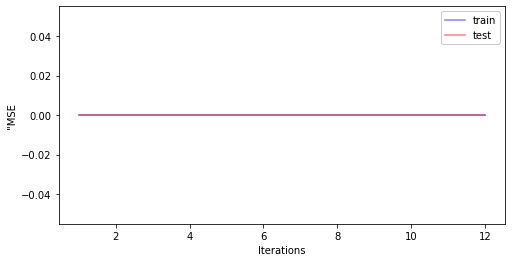

In [134]:
def catboost_best_iterations(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=i,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostClassifier
catboost_best_iterations(X_train, X_test, y_train, y_test, list(range(1,13)))

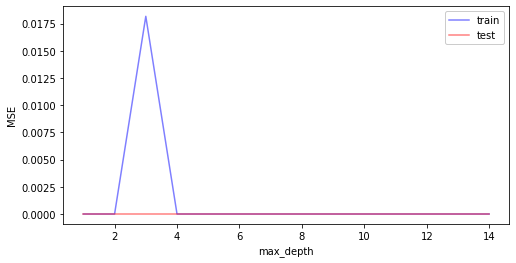

In [135]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=12,max_depth=i,random_state=10).fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train, X_test, y_train, y_test, list(range(1,15)))

# Model

In [136]:
# Fitting CatBoost to the Training set
cb = CatBoostClassifier(iterations=12,max_depth=6,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')

# Results

In [137]:
# Predicting the Test set results
cb_y_pred = cb.predict(X_test)
cb.score(X_test,y_test).round(3)

1.0

Можем сделать вывод что в 100% модель соверашет правильных поступков, ошибок нет

In [138]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, cb_y_pred)
print(cm)

[[11  0]
 [ 0  3]]


Как видно, все 14 примеров распознано верно

Text(0.5, 1.0, 'Boosting. Feature Importance')

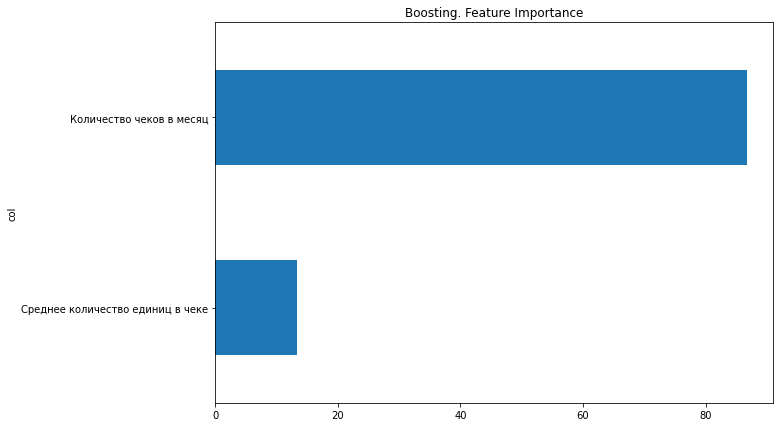

In [139]:
# Features importances
cb_imp = pd.DataFrame({'imp': cb.get_feature_importance(), 'col': col})
cb_imp = cb_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
cb_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


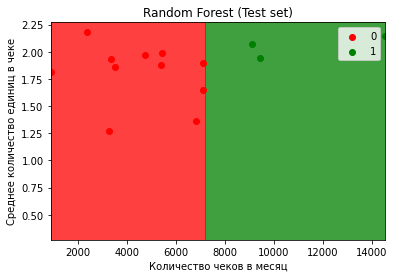

In [140]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков в месяц'].min() - 1, stop = X_set['Количество чеков в месяц'].max() + 1),
                     np.arange(start = X_set['Среднее количество единиц в чеке'].min() - 1, stop = X_set['Среднее количество единиц в чеке'].max() + 1))
plt.contourf(X1, X2, cb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков в месяц'][y_set == j], X_set['Среднее количество единиц в чеке'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков в месяц')
plt.ylabel('Среднее количество единиц в чеке')
plt.legend()
plt.show()

Можем сделать вывод, что используя метод Forest мы получили наихудший результат

# Hierarchical Clustering

In [141]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df_arr = sc.transform(df)

In [142]:
df

,Успех,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,0,9.00,1,2,0,1230.0,1.56,5211.0,15610.0,1,1,0,0,1
1,0,30.00,1,2,0,2715.0,2.03,2424.0,12600.0,1,1,1,0,0
2,0,15.00,1,2,0,878.0,1.81,3868.0,12600.0,1,1,0,1,1
3,0,20.00,1,2,0,2346.0,2.18,4546.0,13930.0,1,1,0,0,1
4,0,30.00,1,2,0,2542.0,1.63,3244.0,16030.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,1,6,1,13552.0,1.89,2306.0,8750.0,0,0,0,1,1
65,1,27.26,1,4,0,7598.0,1.85,4065.0,13300.0,0,0,0,0,1
66,0,148.91,1,2,0,5431.0,1.99,906.0,11060.0,0,0,0,0,0
67,0,50.93,1,3,1,4375.0,1.73,1742.0,11900.0,0,0,0,0,0


In [143]:
df = pd.DataFrame(df_arr, columns=df.columns).round()

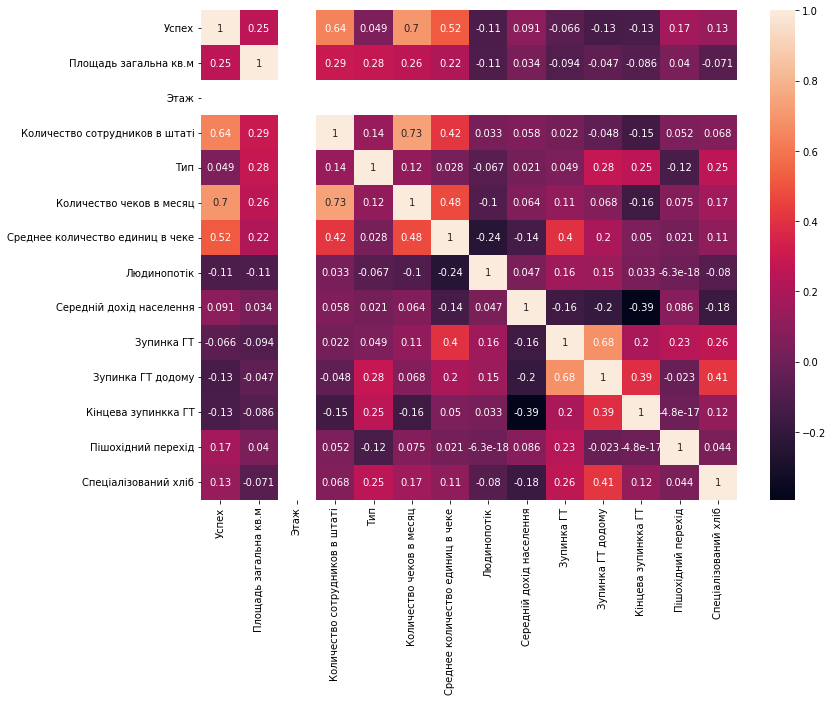

In [144]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

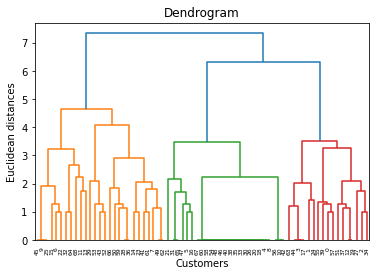

In [145]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [149]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [150]:
hc

array([1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 2,
       0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 0], dtype=int64)

# Feature Reduction

In [151]:
X = df.iloc[:, [0, 5, 6]]

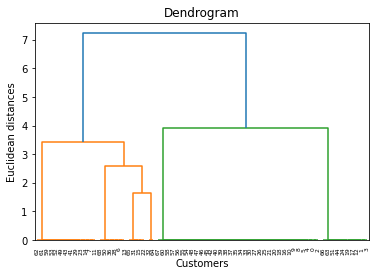

In [152]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Исходя из графика можно сказть что подходящее количество классов это 2

In [155]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [156]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

# K-Means Clustering

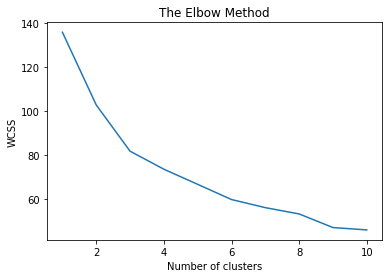

In [157]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

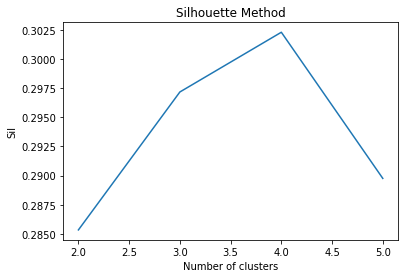

2:0.28533865301520256
3:0.2971751088362449
4:0.3023015250341913
5:0.289760020246165


In [158]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

# Model

In [159]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = df.columns).round(2)

,Успех,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,0.00,-0.00,0.0,0.00,0.06,-0.00,0.50,0.22,0.94,0.89,0.78,0.28,0.39,0.56
1,0.19,0.06,0.0,0.00,-0.00,-0.00,0.09,0.09,1.00,0.03,-0.00,0.00,0.22,0.13
2,1.00,0.16,0.0,0.68,0.05,0.79,0.89,0.11,1.00,0.42,0.26,0.05,0.47,0.42


# Feature Reduction

In [162]:
X = df.iloc[:, [0, 5, 6]]

In [163]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество чеков в месяц','Среднее количество единиц в чеке']).round()

,Успех,Количество чеков в месяц,Среднее количество единиц в чеке
0,0.0,-0.0,0.0
1,1.0,1.0,1.0


Можем сделать вывод что данные разбились на два класса. Один успешных, а второй нет

# Results matching

In [165]:
# Importing hc clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [167]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.6762351642285399

In [168]:
# Export km clusters
import pickle
obj = {'km': km}
output = open('clust-km1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()